In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
df = pd.read_csv(r"C:\Users\Owner\Downloads\archive (1)\Cleaned_Viral_Social_Media_Trends.csv")
df

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium
...,...,...,...,...,...,...,...,...,...,...,...
4995,Post_4996,2023-05-05,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High
4996,Post_4997,2023-09-07,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4997,Post_4998,2022-06-12,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low
4998,Post_4999,2023-05-23,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low


In [27]:
# Convert Post_Date to datetime
df["Post_Date"] = pd.to_datetime(df["Post_Date"])


In [29]:
# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (5000, 11)

Column Names: ['Post_ID', 'Post_Date', 'Platform', 'Hashtag', 'Content_Type', 'Region', 'Views', 'Likes', 'Shares', 'Comments', 'Engagement_Level']

First 5 rows:
   Post_ID  Post_Date   Platform     Hashtag Content_Type     Region    Views  \
0  Post_1 2022-01-13     TikTok  #Challenge        Video         UK  4163464   
1  Post_2 2022-05-13  Instagram  #Education       Shorts      India  4155940   
2  Post_3 2022-01-07    Twitter  #Challenge        Video     Brazil  3666211   
3  Post_4 2022-12-05    YouTube  #Education       Shorts  Australia   917951   
4  Post_5 2023-03-23     TikTok      #Dance         Post     Brazil    64866   

    Likes  Shares  Comments Engagement_Level  
0  339431   53135     19346             High  
1  215240   65860     27239           Medium  
2  327143   39423     36223           Medium  
3  127125   11687     36806              Low  
4  171361   69581      6376           Medium  

Data Types:
 Post_ID                     obje

In [33]:
# QUESTION 1: Platform Comparison & ROI Analysis
# ============================================================================
print("\n" + "="*80)
print("QUESTION 1: PLATFORM COMPARISON & ENGAGEMENT RATE ANALYSIS")
print("="*80)


QUESTION 1: PLATFORM COMPARISON & ENGAGEMENT RATE ANALYSIS


In [39]:
# Calculate Engagement Rate for each post
df['Engagement_Rate'] = ((df['Likes'] + df['Comments'] + df['Shares']) / df['Views']) * 100

In [41]:
# Platform performance summary
platform_performance = df.groupby('Platform').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Shares': 'mean',
    'Comments': 'mean',
    'Engagement_Rate': 'mean',
    'Post_ID': 'count'
}).rename(columns={'Post_ID': 'Total_Posts'}).round(2)

platform_performance = platform_performance.sort_values('Engagement_Rate', ascending=False)
print("\nPlatform Performance Summary:")
print(platform_performance)


Platform Performance Summary:
                Views      Likes    Shares  Comments  Engagement_Rate  \
Platform                                                                
Instagram  2404079.88  257118.22  50310.91  24958.11            66.21   
TikTok     2515015.40  244206.72  51468.26  24778.70            63.87   
YouTube    2545648.40  258314.00  50073.09  25321.39            50.64   
Twitter    2506004.59  245880.12  50227.75  24456.86            46.54   

           Total_Posts  
Platform                
Instagram         1212  
TikTok            1260  
YouTube           1324  
Twitter           1204  


In [43]:
# Best performing platform
best_platform = platform_performance['Engagement_Rate'].idxmax()
print(f"\n🏆 Best Platform: {best_platform} with {platform_performance.loc[best_platform, 'Engagement_Rate']:.2f}% engagement rate")


🏆 Best Platform: Instagram with 66.21% engagement rate


In [45]:
# QUESTION 2: Content Type Performance Analysis
# ============================================================================
print("\n" + "="*80)
print("QUESTION 2: CONTENT TYPE PERFORMANCE ANALYSIS")
print("="*80)


QUESTION 2: CONTENT TYPE PERFORMANCE ANALYSIS


In [47]:
# Content type performance by platform
content_performance = df.groupby(['Platform', 'Content_Type']).agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Shares': 'mean',
    'Comments': 'mean',
    'Engagement_Rate': 'mean',
    'Post_ID': 'count'
}).rename(columns={'Post_ID': 'Total_Posts'}).round(2)

print("\nContent Type Performance by Platform:")
print(content_performance)

# Overall content type performance
overall_content = df.groupby('Content_Type').agg({
    'Views': ['mean', 'sum'],
    'Engagement_Rate': 'mean',
    'Post_ID': 'count'
}).round(2)

overall_content.columns = ['Avg_Views', 'Total_Views', 'Avg_Engagement_Rate', 'Total_Posts']
overall_content['View_Share_%'] = (overall_content['Total_Views'] / overall_content['Total_Views'].sum() * 100).round(2)
print("\nOverall Content Type Performance:")
print(overall_content.sort_values('Avg_Engagement_Rate', ascending=False))


Content Type Performance by Platform:
                             Views      Likes    Shares  Comments  \
Platform  Content_Type                                              
Instagram Live Stream   2302789.79  278308.38  51438.85  25603.68   
          Post          2587567.17  252381.03  49591.68  23707.68   
          Reel          2357593.45  245218.71  53555.18  24737.33   
          Shorts        2352192.37  250926.63  49229.46  25506.07   
          Tweet         2434467.87  252875.96  49404.13  25730.84   
          Video         2407529.13  261794.02  48365.35  24473.19   
TikTok    Live Stream   2405589.67  224167.11  50662.02  23948.48   
          Post          2504726.94  249243.15  53530.05  25094.01   
          Reel          2678071.03  254493.80  53984.17  25768.02   
          Shorts        2534584.26  243964.24  49862.92  24697.26   
          Tweet         2509944.81  242029.71  50695.00  24291.33   
          Video         2456758.71  251171.87  50171.46  24887.4

In [49]:
print("\n" + "="*80)
print("QUESTION 3: VIRAL CONTENT IDENTIFICATION")
print("="*80)

# Calculate total engagement
df['Total_Engagement'] = df['Likes'] + df['Comments'] + df['Shares']


QUESTION 3: VIRAL CONTENT IDENTIFICATION


In [51]:
# Top 10 viral posts
top_10_viral = df.nlargest(10, 'Total_Engagement')[['Post_ID', 'Platform', 'Content_Type', 
                                                       'Hashtag', 'Region', 'Views', 
                                                       'Total_Engagement', 'Engagement_Rate', 
                                                       'Engagement_Level']]
print("\n🔥 Top 10 Viral Posts:")
print(top_10_viral)

# Engagement level distribution
engagement_distribution = df['Engagement_Level'].value_counts()
engagement_percentage = (df['Engagement_Level'].value_counts(normalize=True) * 100).round(2)

engagement_summary = pd.DataFrame({
    'Count': engagement_distribution,
    'Percentage': engagement_percentage
})
print("\n📊 Engagement Level Distribution:")
print(engagement_summary)

# Average metrics by engagement level
engagement_metrics = df.groupby('Engagement_Level').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Shares': 'mean',
    'Comments': 'mean',
    'Engagement_Rate': 'mean'
}).round(2)
print("\nAverage Metrics by Engagement Level:")
print(engagement_metrics)


🔥 Top 10 Viral Posts:
        Post_ID   Platform Content_Type     Hashtag     Region    Views  \
2907  Post_2908  Instagram  Live Stream  #Challenge         UK  4498056   
4960  Post_4961  Instagram        Tweet       #Tech    Germany  2964544   
3619  Post_3620    YouTube         Reel      #Dance    Germany  3371356   
1871  Post_1872  Instagram       Shorts       #Tech      India   301575   
556    Post_557  Instagram         Post    #Fitness    Germany   129205   
2864  Post_2865  Instagram         Reel      #Viral  Australia  1831119   
4759  Post_4760    YouTube        Tweet      #Music      India  2050005   
2492  Post_2493    Twitter         Reel    #Fashion     Brazil  3802774   
3016  Post_3017    Twitter        Tweet    #Fashion         UK  1072473   
8        Post_9    Twitter  Live Stream  #Education      India  2169523   

      Total_Engagement  Engagement_Rate Engagement_Level  
2907            635139        14.120300             High  
4960            630930        21.

In [53]:
print("\n" + "="*80)
print("QUESTION 4: REGIONAL MARKET PERFORMANCE")
print("="*80)


QUESTION 4: REGIONAL MARKET PERFORMANCE


In [55]:
# Regional performance
regional_performance = df.groupby('Region').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Shares': 'mean',
    'Comments': 'mean',
    'Engagement_Rate': 'mean',
    'Post_ID': 'count'
}).rename(columns={'Post_ID': 'Total_Posts'}).round(2)

regional_performance = regional_performance.sort_values('Engagement_Rate', ascending=False)
print("\n🌍 Regional Performance:")
print(regional_performance)

# Top 3 markets
top_3_regions = regional_performance.head(3)
print("\n🏆 Top 3 Markets for Expansion:")
print(top_3_regions)

# Best content type by region
best_content_by_region = df.groupby(['Region', 'Content_Type'])['Engagement_Rate'].mean().round(2)
print("\nBest Content Type by Region:")
print(best_content_by_region.unstack().fillna(0))

# Best hashtag by region
best_hashtag_by_region = df.groupby(['Region', 'Hashtag'])['Engagement_Rate'].mean().round(2)
print("\nBest Hashtag by Region:")
print(best_hashtag_by_region.unstack().fillna(0))


🌍 Regional Performance:
                Views      Likes    Shares  Comments  Engagement_Rate  \
Region                                                                  
USA        2595201.98  247135.81  50634.55  25286.50            91.08   
Australia  2428899.41  254386.14  50790.50  25025.56            55.56   
Japan      2415867.09  256580.85  51566.59  24829.77            55.05   
Canada     2443445.26  256208.66  50455.47  25015.65            54.87   
UK         2502360.93  254020.39  50462.62  24110.31            53.89   
Brazil     2557725.78  248019.75  50675.54  24754.54            53.36   
India      2452791.38  250935.31  50328.19  25227.58            50.05   
Germany    2546467.67  244317.39  49170.30  24850.98            35.41   

           Total_Posts  
Region                  
USA                677  
Australia          602  
Japan              592  
Canada             658  
UK                 647  
Brazil             641  
India              617  
Germany            

In [57]:
print("\n" + "="*80)
print("QUESTION 5: HASHTAG STRATEGY & EFFECTIVENESS")
print("="*80)

# Hashtag performance
hashtag_performance = df.groupby('Hashtag').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Shares': 'mean',
    'Comments': 'mean',
    'Engagement_Rate': 'mean',
    'Post_ID': 'count'
}).rename(columns={'Post_ID': 'Total_Posts'}).round(2)

hashtag_performance = hashtag_performance.sort_values('Engagement_Rate', ascending=False)
print("\n#️⃣ Hashtag Performance:")
print(hashtag_performance)

# Comment to view conversion rate (engagement depth)
df['Comment_Rate'] = (df['Comments'] / df['Views'] * 100).round(4)
hashtag_conversion = df.groupby('Hashtag')['Comment_Rate'].mean().sort_values(ascending=False).round(4)
print("\n💬 Best Hashtags by Comment Conversion Rate:")
print(hashtag_conversion)

# Best hashtag
best_hashtag = hashtag_performance['Engagement_Rate'].idxmax()
print(f"\n🏆 Best Hashtag: {best_hashtag} with {hashtag_performance.loc[best_hashtag, 'Engagement_Rate']:.2f}% engagement rate")


QUESTION 5: HASHTAG STRATEGY & EFFECTIVENESS

#️⃣ Hashtag Performance:
                 Views      Likes    Shares  Comments  Engagement_Rate  \
Hashtag                                                                  
#Viral      2437590.28  249964.49  50428.89  24776.51           100.47   
#Comedy     2450141.71  253615.75  49418.05  24798.89            66.96   
#Gaming     2500698.95  242819.59  51360.82  25332.24            62.07   
#Fitness    2599391.00  253130.12  51183.12  24532.69            54.41   
#Tech       2516381.46  260347.15  48287.21  25799.55            53.61   
#Education  2531227.84  260423.42  51748.70  24684.92            50.87   
#Fashion    2426830.62  249970.58  50956.94  24206.32            48.84   
#Dance      2447362.77  254484.89  49557.96  24565.04            46.66   
#Challenge  2451335.16  241212.44  51182.43  25207.85            45.96   
#Music      2568758.78  248012.82  50965.63  25024.50            39.55   

            Total_Posts  
Hashtag      

In [59]:
print("\n" + "="*80)
print("QUESTION 7: CONTENT SATURATION ANALYSIS")
print("="*80)

# Calculate correlation between posting frequency and engagement
monthly_stats = df.groupby(df['Post_Date'].dt.to_period('M')).agg({
    'Post_ID': 'count',
    'Engagement_Rate': 'mean'
}).rename(columns={'Post_ID': 'Posts_Count'})

correlation = monthly_stats['Posts_Count'].corr(monthly_stats['Engagement_Rate'])
print(f"\n📉 Correlation between Posts Count and Engagement Rate: {correlation:.4f}")

if correlation < 0:
    print("⚠️  ALERT: Negative correlation detected - More posts may lead to lower engagement (Content Saturation)")
else:
    print("✅ Positive correlation - More posts lead to higher engagement")

# Platform-specific saturation
platform_saturation = df.groupby(['Platform', df['Post_Date'].dt.to_period('M')]).agg({
    'Post_ID': 'count',
    'Engagement_Rate': 'mean'
}).reset_index()

print("\n📊 Platform-Specific Posting Analysis:")
for platform in df['Platform'].unique():
    platform_data = platform_saturation[platform_saturation['Platform'] == platform]
    if len(platform_data) > 1:
        corr = platform_data['Post_ID'].corr(platform_data['Engagement_Rate'])
        print(f"{platform}: Correlation = {corr:.4f}")


QUESTION 7: CONTENT SATURATION ANALYSIS

📉 Correlation between Posts Count and Engagement Rate: 0.2168
✅ Positive correlation - More posts lead to higher engagement

📊 Platform-Specific Posting Analysis:
TikTok: Correlation = 0.3191
Instagram: Correlation = -0.0513
Twitter: Correlation = 0.2436
YouTube: Correlation = -0.0899


In [61]:
print("\n" + "="*80)
print("QUESTION 8: ENGAGEMENT LEVEL PREDICTION FACTORS")
print("="*80)

# Encode engagement level
engagement_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Engagement_Level_Numeric'] = df['Engagement_Level'].map(engagement_mapping)

# Correlation analysis
correlation_factors = df[['Views', 'Likes', 'Shares', 'Comments', 
                          'Engagement_Rate', 'Engagement_Level_Numeric']].corr()['Engagement_Level_Numeric'].sort_values(ascending=False)

print("\n🔍 Correlation with High Engagement Level:")
print(correlation_factors)

# Multi-variable analysis - Best combinations for High engagement
high_engagement = df[df['Engagement_Level'] == 'High']

best_combinations = high_engagement.groupby(['Platform', 'Content_Type', 'Hashtag', 'Region']).agg({
    'Post_ID': 'count',
    'Engagement_Rate': 'mean'
}).rename(columns={'Post_ID': 'High_Engagement_Posts'}).sort_values('High_Engagement_Posts', ascending=False).head(10)

print("\n🎯 Top 10 Combinations for High Engagement:")
print(best_combinations)


QUESTION 8: ENGAGEMENT LEVEL PREDICTION FACTORS

🔍 Correlation with High Engagement Level:
Engagement_Level_Numeric    1.000000
Engagement_Rate             0.008818
Shares                      0.006677
Likes                      -0.007809
Comments                   -0.016758
Views                      -0.016788
Name: Engagement_Level_Numeric, dtype: float64

🎯 Top 10 Combinations for High Engagement:
                                             High_Engagement_Posts  \
Platform  Content_Type Hashtag    Region                             
Instagram Live Stream  #Music     USA                            5   
Twitter   Post         #Viral     Brazil                         5   
Instagram Live Stream  #Music     Australia                      5   
TikTok    Live Stream  #Gaming    Brazil                         5   
Instagram Live Stream  #Fitness   USA                            5   
Twitter   Live Stream  #Comedy    UK                             4   
YouTube   Video        #Gaming    J

In [63]:
print("\n" + "="*80)
print("QUESTION 9: SHARE RATE & VIRALITY COEFFICIENT")
print("="*80)

# Calculate virality coefficient
df['Virality_Coefficient'] = (df['Shares'] / df['Views'] * 100).round(4)
df['Share_Rate'] = (df['Shares'] / df['Views'] * 100).round(4)

# Virality by platform
virality_by_platform = df.groupby('Platform').agg({
    'Virality_Coefficient': 'mean',
    'Share_Rate': 'mean',
    'Shares': 'sum',
    'Views': 'sum'
}).round(4)

virality_by_platform = virality_by_platform.sort_values('Virality_Coefficient', ascending=False)
print("\n🚀 Virality Coefficient by Platform:")
print(virality_by_platform)

# Virality by content type
virality_by_content = df.groupby('Content_Type').agg({
    'Virality_Coefficient': 'mean',
    'Share_Rate': 'mean'
}).round(4).sort_values('Virality_Coefficient', ascending=False)

print("\n📱 Virality by Content Type:")
print(virality_by_content)

# Virality by hashtag
virality_by_hashtag = df.groupby('Hashtag').agg({
    'Virality_Coefficient': 'mean',
    'Share_Rate': 'mean'
}).round(4).sort_values('Virality_Coefficient', ascending=False)

print("\n#️⃣ Virality by Hashtag:")
print(virality_by_hashtag)

# Correlation between virality and reach
virality_reach_corr = df['Virality_Coefficient'].corr(df['Views'])
print(f"\n📊 Correlation between Virality and Reach: {virality_reach_corr:.4f}")



QUESTION 9: SHARE RATE & VIRALITY COEFFICIENT

🚀 Virality Coefficient by Platform:
           Virality_Coefficient  Share_Rate    Shares       Views
Platform                                                         
Instagram               10.8009     10.8009  60976822  2913744812
YouTube                  7.4067      7.4067  66296773  3370438480
TikTok                   7.3645      7.3645  64850003  3168919406
Twitter                  6.7116      6.7116  60474212  3017229522

📱 Virality by Content Type:
              Virality_Coefficient  Share_Rate
Content_Type                                  
Live Stream                10.0627     10.0627
Tweet                       8.4254      8.4254
Video                       8.0989      8.0989
Post                        8.0377      8.0377
Shorts                      7.1362      7.1362
Reel                        6.4587      6.4587

#️⃣ Virality by Hashtag:
            Virality_Coefficient  Share_Rate
Hashtag                                     

In [65]:
print("\n" + "="*80)
print("QUESTION 10: ENGAGEMENT QUALITY SCORE & RECOMMENDATIONS")
print("="*80)

# Normalize metrics (0-1 scale)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Likes_Normalized'] = scaler.fit_transform(df[['Likes']])
df['Comments_Normalized'] = scaler.fit_transform(df[['Comments']])
df['Shares_Normalized'] = scaler.fit_transform(df[['Shares']])
df['Views_Normalized'] = scaler.fit_transform(df[['Views']])

# Calculate Engagement Quality Score
df['Engagement_Quality_Score'] = (
    0.3 * df['Likes_Normalized'] +
    0.3 * df['Comments_Normalized'] +
    0.2 * df['Shares_Normalized'] +
    0.2 * df['Views_Normalized']
) * 100

print("\n⭐ Top 10 Posts by Engagement Quality Score:")
top_quality = df.nlargest(10, 'Engagement_Quality_Score')[['Post_ID', 'Platform', 'Content_Type', 
                                                            'Hashtag', 'Region', 'Engagement_Quality_Score',
                                                            'Engagement_Rate']].round(2)
print(top_quality)

# Optimal strategy recommendation
optimal_strategy = df.groupby(['Platform', 'Content_Type', 'Hashtag', 'Region']).agg({
    'Engagement_Quality_Score': 'mean',
    'Views': 'mean',
    'Engagement_Rate': 'mean',
    'Post_ID': 'count'
}).rename(columns={'Post_ID': 'Total_Posts'}).round(2)

optimal_strategy = optimal_strategy.sort_values('Engagement_Quality_Score', ascending=False).head(5)

print("\n🎯 TOP 5 RECOMMENDED CONTENT STRATEGIES:")
print(optimal_strategy)

# Best overall recommendation
best_strategy = optimal_strategy.iloc[0]
print("\n" + "="*80)
print("🏆 OPTIMAL CONTENT STRATEGY RECOMMENDATION:")
print("="*80)
print(f"Platform: {best_strategy.name[0]}")
print(f"Content Type: {best_strategy.name[1]}")
print(f"Hashtag: {best_strategy.name[2]}")
print(f"Region: {best_strategy.name[3]}")
print(f"Average Engagement Quality Score: {best_strategy['Engagement_Quality_Score']:.2f}")
print(f"Average Views: {best_strategy['Views']:,.0f}")
print(f"Average Engagement Rate: {best_strategy['Engagement_Rate']:.2f}%")
print(f"Total Successful Posts: {best_strategy['Total_Posts']}")


QUESTION 10: ENGAGEMENT QUALITY SCORE & RECOMMENDATIONS

⭐ Top 10 Posts by Engagement Quality Score:
        Post_ID   Platform Content_Type     Hashtag   Region  \
2907  Post_2908  Instagram  Live Stream  #Challenge       UK   
1528  Post_1529  Instagram       Shorts       #Tech    India   
215    Post_216     TikTok         Post    #Fitness      USA   
1156  Post_1157  Instagram         Reel       #Tech   Canada   
3619  Post_3620    YouTube         Reel      #Dance  Germany   
534    Post_535    YouTube        Tweet      #Dance    India   
2004  Post_2005     TikTok         Post     #Gaming      USA   
503    Post_504    Twitter         Reel  #Education       UK   
2752  Post_2753  Instagram       Shorts     #Comedy   Canada   
331    Post_332    YouTube         Post  #Education      USA   

      Engagement_Quality_Score  Engagement_Rate  
2907                     95.24            14.12  
1528                     93.83            12.76  
215                      93.55            1

In [67]:
print("\n" + "="*80)
print("📊 EXECUTIVE SUMMARY")
print("="*80)

print(f"""
🎯 KEY INSIGHTS:
- Total Posts Analyzed: {len(df):,}
- Total Views: {df['Views'].sum():,}
- Total Engagement: {df['Total_Engagement'].sum():,}
- Average Engagement Rate: {df['Engagement_Rate'].mean():.2f}%
- Best Platform: {best_platform}
- Best Hashtag: {best_hashtag}
- High Engagement Posts: {len(df[df['Engagement_Level'] == 'High']):,} ({len(df[df['Engagement_Level'] == 'High'])/len(df)*100:.1f}%)
""")


📊 EXECUTIVE SUMMARY

🎯 KEY INSIGHTS:
- Total Posts Analyzed: 5,000
- Total Views: 12,470,332,220
- Total Engagement: 1,634,414,928
- Average Engagement Rate: 56.76%
- Best Platform: Instagram
- Best Hashtag: #Viral
- High Engagement Posts: 1,673 (33.5%)



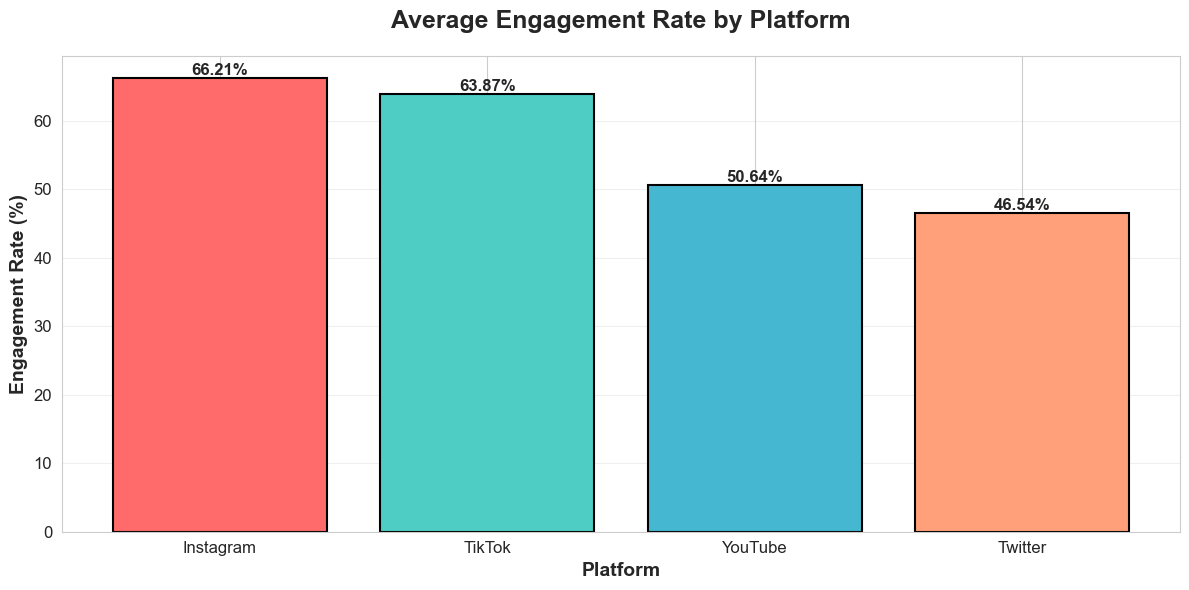

In [71]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================================
# GRAPH 1: Platform Engagement Rate Comparison
# ============================================================================
plt.figure(figsize=(12, 6))
platform_data = df.groupby('Platform')['Engagement_Rate'].mean().sort_values(ascending=False)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
bars = plt.bar(platform_data.index, platform_data.values, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Average Engagement Rate by Platform', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Platform', fontsize=14, fontweight='bold')
plt.ylabel('Engagement Rate (%)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('platform_engagement_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


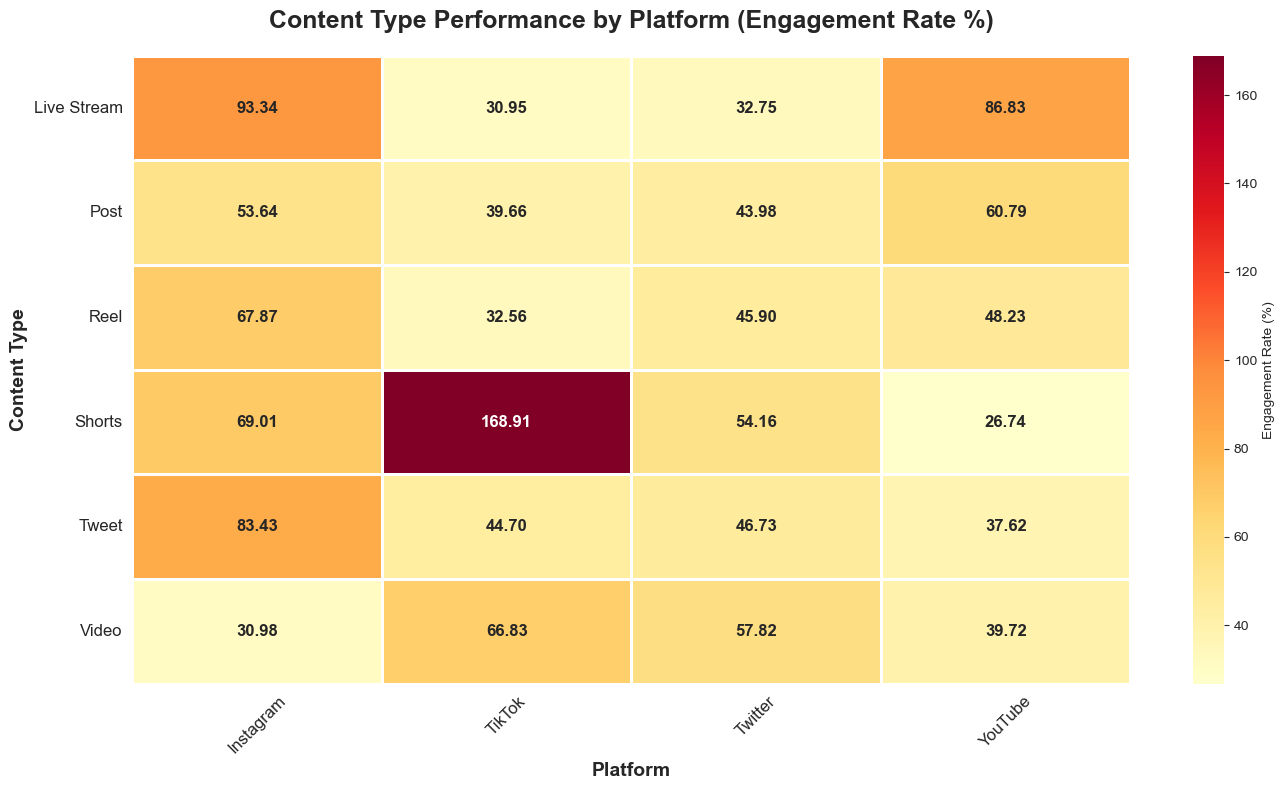

In [73]:
# ============================================================================
# GRAPH 2: Content Type Performance Heatmap
# ============================================================================
plt.figure(figsize=(14, 8))
heatmap_data = df.pivot_table(values='Engagement_Rate', 
                               index='Content_Type', 
                               columns='Platform', 
                               aggfunc='mean')

sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Engagement Rate (%)'}, 
            linewidths=2, linecolor='white',
            annot_kws={'fontsize': 12, 'fontweight': 'bold'})

plt.title('Content Type Performance by Platform (Engagement Rate %)', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Platform', fontsize=14, fontweight='bold')
plt.ylabel('Content Type', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.savefig('content_type_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

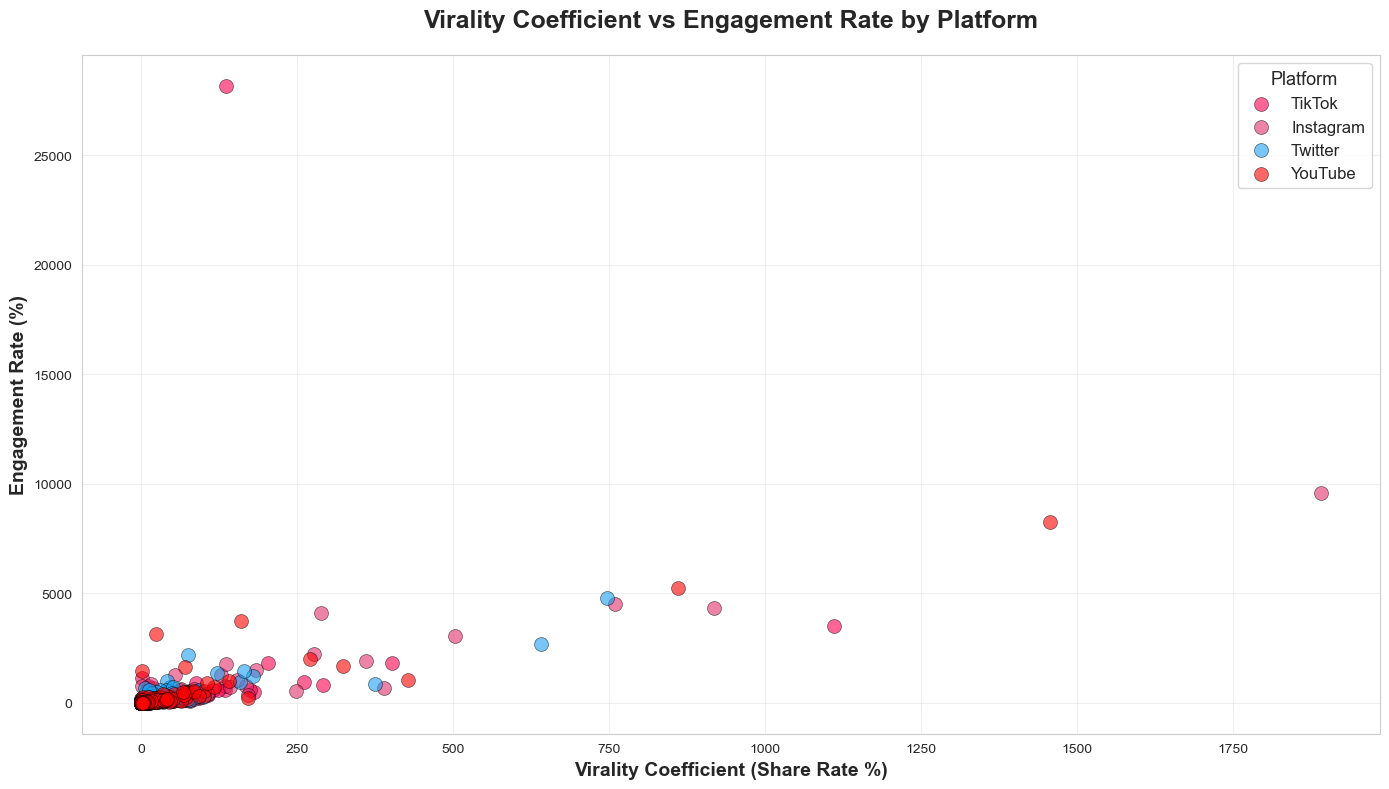

In [75]:
# ============================================================================
# GRAPH 3: Virality Coefficient vs Engagement Rate (Scatter Plot)
# ============================================================================
plt.figure(figsize=(14, 8))

# Create scatter plot with different colors for each platform
platforms = df['Platform'].unique()
colors_map = {'TikTok': '#FF0050', 'Instagram': '#E1306C', 
              'YouTube': '#FF0000', 'Twitter': '#1DA1F2'}

for platform in platforms:
    platform_data = df[df['Platform'] == platform]
    plt.scatter(platform_data['Virality_Coefficient'], 
                platform_data['Engagement_Rate'],
                label=platform, 
                alpha=0.6, 
                s=100,
                color=colors_map.get(platform, '#333333'),
                edgecolors='black',
                linewidth=0.5)

plt.title('Virality Coefficient vs Engagement Rate by Platform', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Virality Coefficient (Share Rate %)', fontsize=14, fontweight='bold')
plt.ylabel('Engagement Rate (%)', fontsize=14, fontweight='bold')
plt.legend(title='Platform', fontsize=12, title_fontsize=13, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('virality_vs_engagement.png', dpi=300, bbox_inches='tight')
plt.show()


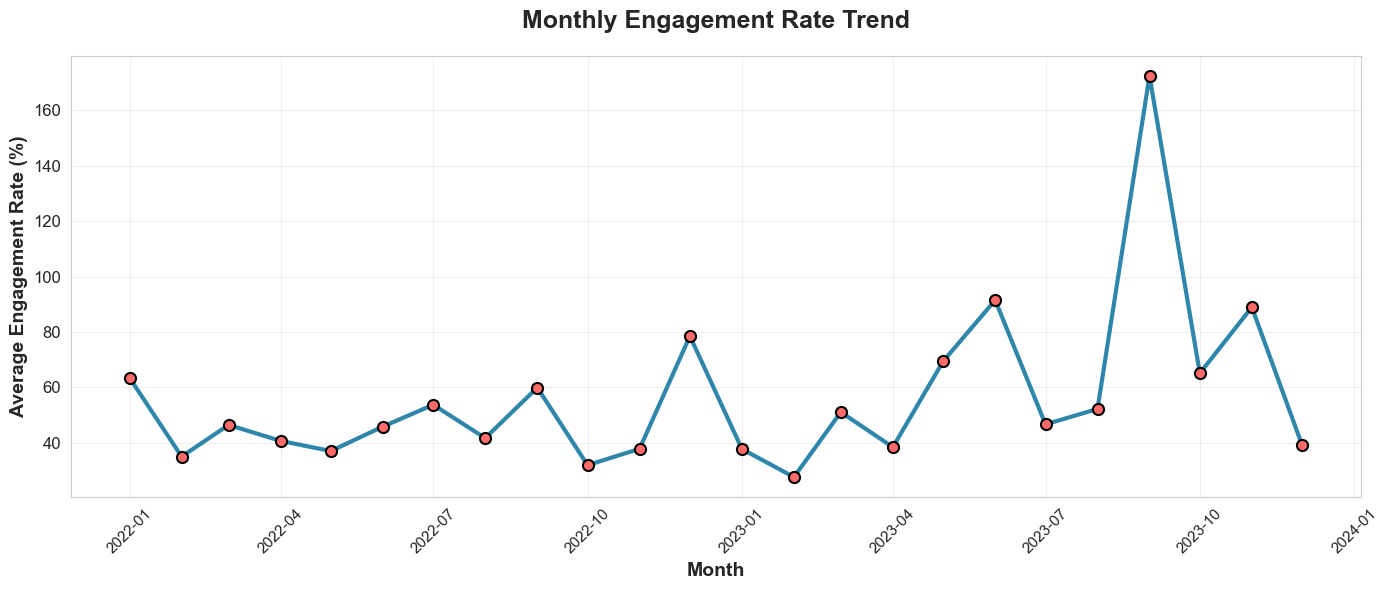

In [77]:
# ============================================================================
# GRAPH 4: Time Series - Monthly Engagement Trend
# ============================================================================
plt.figure(figsize=(14, 6))
monthly_trend = df.groupby(df['Post_Date'].dt.to_period('M'))['Engagement_Rate'].mean()
monthly_trend.index = monthly_trend.index.to_timestamp()

plt.plot(monthly_trend.index, monthly_trend.values, 
         marker='o', linewidth=3, markersize=8, 
         color='#2E86AB', markerfacecolor='#FF6B6B', 
         markeredgecolor='black', markeredgewidth=1.5)

plt.title('Monthly Engagement Rate Trend', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Average Engagement Rate (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('monthly_engagement_trend.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x600 with 0 Axes>

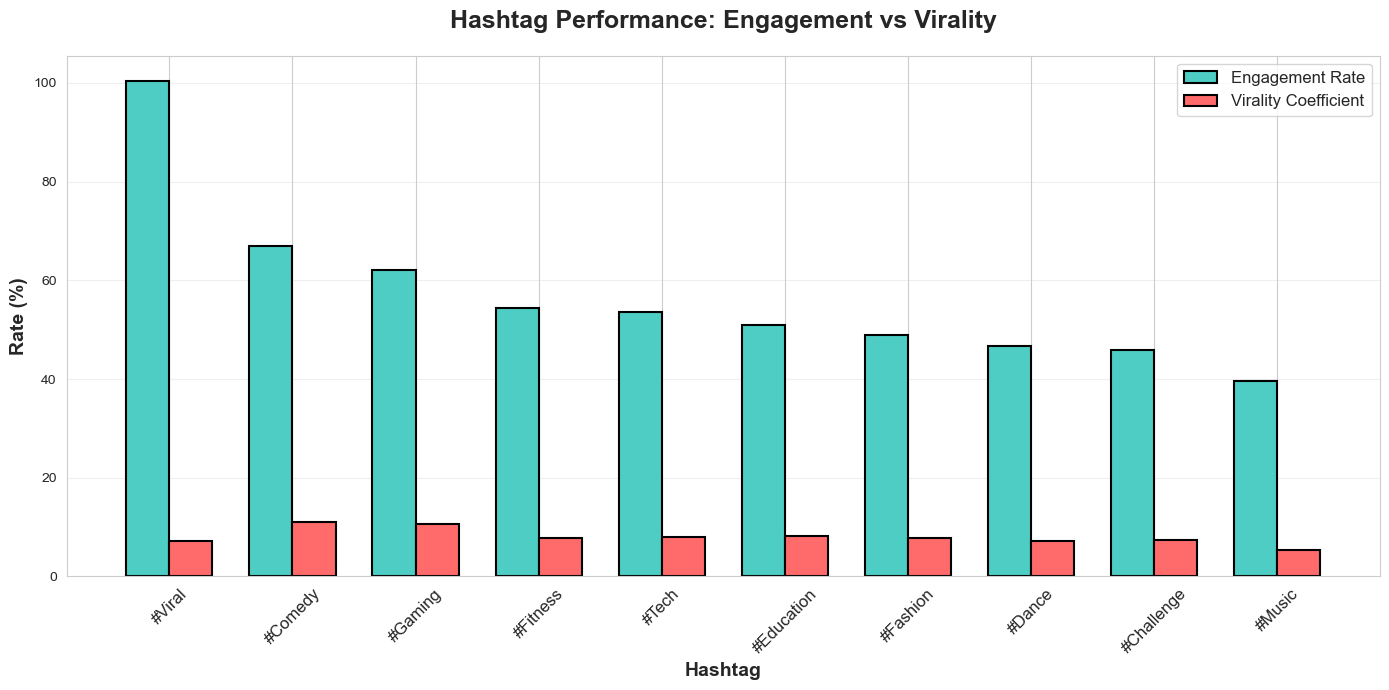


✅ All visualizations saved successfully!


In [79]:

# ============================================================================
# BONUS GRAPH 5: Hashtag Performance Comparison
# ============================================================================
plt.figure(figsize=(12, 6))
hashtag_data = df.groupby('Hashtag').agg({
    'Engagement_Rate': 'mean',
    'Virality_Coefficient': 'mean'
}).sort_values('Engagement_Rate', ascending=False)

x = np.arange(len(hashtag_data))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width/2, hashtag_data['Engagement_Rate'], width, 
               label='Engagement Rate', color='#4ECDC4', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, hashtag_data['Virality_Coefficient'], width, 
               label='Virality Coefficient', color='#FF6B6B', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Hashtag', fontsize=14, fontweight='bold')
ax.set_ylabel('Rate (%)', fontsize=14, fontweight='bold')
ax.set_title('Hashtag Performance: Engagement vs Virality', fontsize=18, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(hashtag_data.index, fontsize=12, rotation=45)
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('hashtag_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ All visualizations saved successfully!")

In [81]:
# Save enhanced dataframe with calculated metrics
df.to_csv('social_media_analysis_results.csv', index=False)
print("\n✅ Analysis complete! Results saved to 'social_media_analysis_results.csv'")


✅ Analysis complete! Results saved to 'social_media_analysis_results.csv'
